C:\Users\ijung\anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:2618: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)
C:\Users\ijung\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


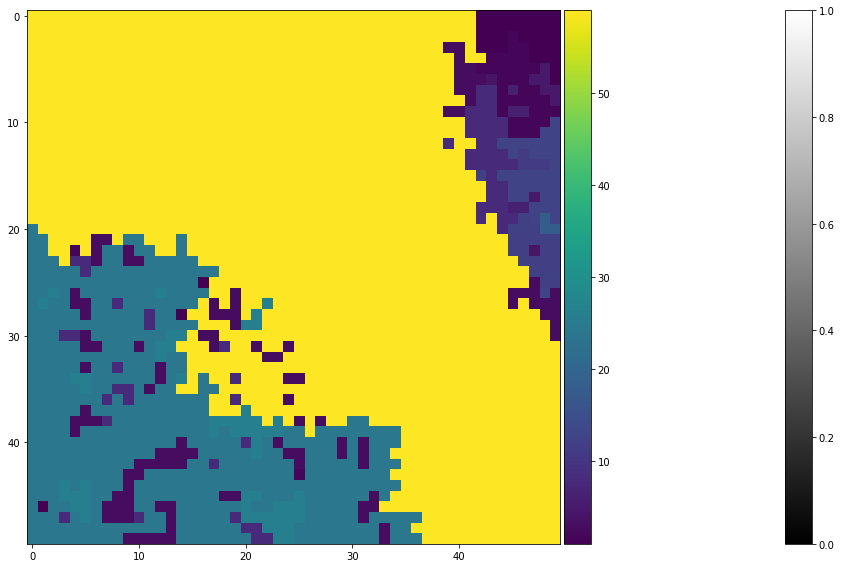

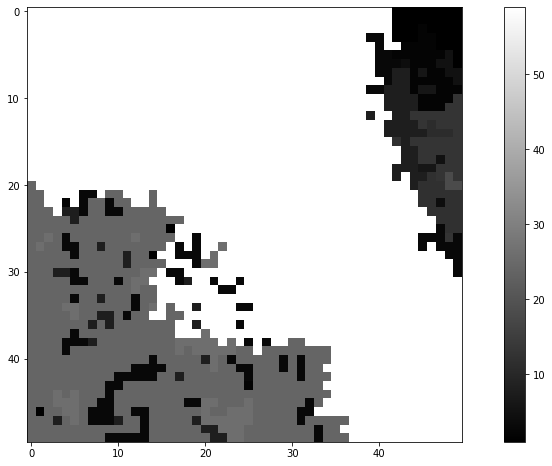

In [2]:
import skimage.io as sk
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from Functions import image_processing as ip


gtimage = sk.imread("../Data/N2DH-GOWT1/gt/man_seg01.tif")
gt01 = np.ndarray.clip(gtimage,0, 1) # background is 0; regions are 1
# ip.show_image(gt01, 15, 8)
im = Image.fromarray(gt01)
im.save("gt01safe.tif") # speichern des bearbeiteten GT

gt01_resize = gt01[300:350, 400:450]
ip.show_image(gt01_resize, 15, 8)


imgimage = sk.imread("../t01tifimg.tif") # insegesamt 59 Regionen in Img1
np.any(imgimage >= 59)
sk.imshow(imgimage)
ip.show_image(imgimage,15, 8)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


(array([   0.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5],
       dtype=float32),
 <a list of 10 Patch objects>)

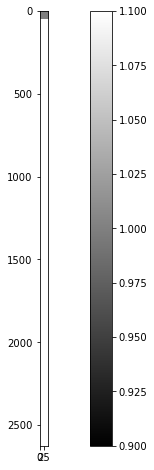

In [3]:
def imgclip (img, t1):
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            intens = img[i, j]
            if intens == t1:
                img[i, j] = 0
            else:
                img[i, j] = 1
    return img

img01 = imgclip(imgimage, 58)
np.any(img01 == 1)
print(img01)
#img01 = np.ndarray.clip(imgimage,0, 1) # background is 0; regions are 1
ip.show_image(img01, 15, 8)
plt.hist(img01.flatten())


In [4]:
#def dice_score (seg, gt):
#    dice = 0.5*(np.sum(seg[gt == k]) / (np.sum(seg) + np.sum(gt)))
#    return dice

#dice_score(imgimage, gt01_resize)



In [5]:
def dice_score_gewichtet (seg, gt):
    schnittmenge_cell = 0
    segment_cell = 0
    gt_cell = 0
    schnittmenge_bg = 0
    segment_bg = 0
    gt_bg = 0
    for i in np.ndindex(seg.shape):
        if seg[i] == gt[i] == 1:
            schnittmenge_cell = schnittmenge_cell + 1
        if seg[i] == 1:
            segment_cell = segment_cell + 1
        if gt[i] == 1:
            gt_cell = gt_cell + 1
    for i in np.ndindex(seg.shape):
        if seg[i] == gt[i] == 0:
            schnittmenge_bg = schnittmenge_bg + 1
        if gt[i] == 0:
            segment_bg = segment_bg + 1
        if seg[i] == 0:
            gt_bg = gt_bg + 1
    dice = 0.5 * ((2*schnittmenge_cell)/(segment_cell + gt_cell)+(2*schnittmenge_bg)/(segment_bg + gt_bg))

    return dice


0.494949494949495

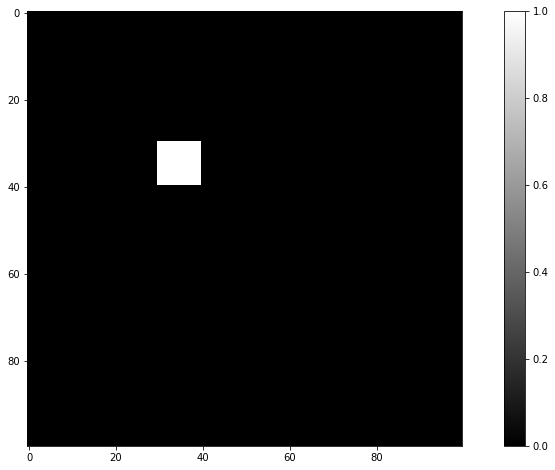

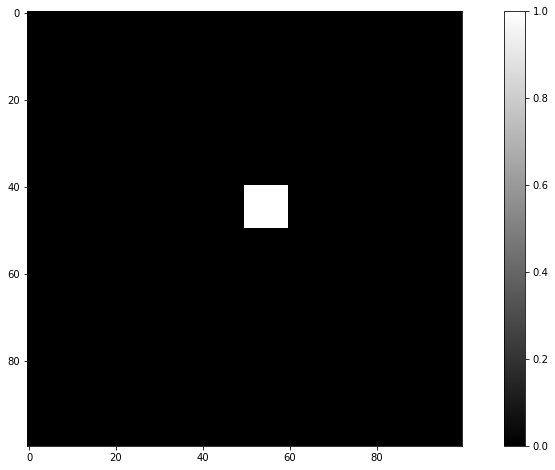

In [6]:
test01 = np.zeros([100,100])
test01[30:40,30:40] = 1
ip.show_image(test01, 15, 8)

test02 = np.zeros([100,100])
test02[40:50,50:60] = 1
ip.show_image(test02, 15, 8)

dice_score_gewichtet(test01, test02)
#dice_score_gewichtet(test01, test01)



In [7]:
# insegsamt ist Dice um den Faktor 100 zu hoch; keine Ahnung wieso
def dice_score_ungewichtet (seg, gt):
    schnittmenge_cell = 0
    for i in np.ndindex(seg.shape):
        if seg[i] == gt[i]:
            schnittmenge_cell = schnittmenge_cell + 1
    dice = (2*schnittmenge_cell)/(len(seg) + len(gt))/100

    return dice

0.71

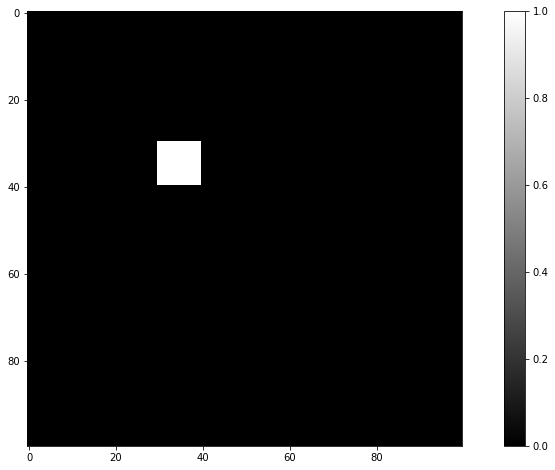

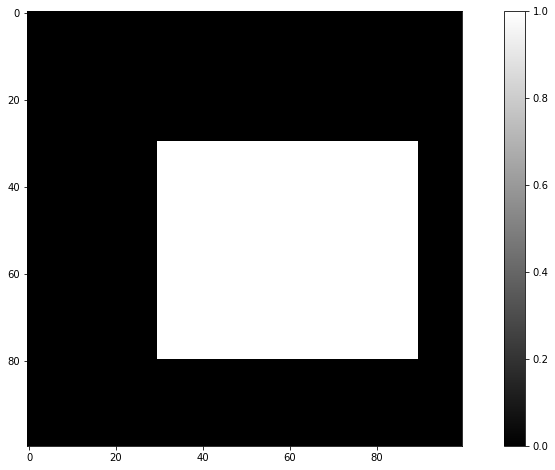

In [8]:
test01 = np.zeros([100,100])
test01[30:40,30:40] = 1
ip.show_image(test01, 15, 8)

test02 = np.zeros([100,100])
test02[30:80,30:90] = 1
ip.show_image(test02, 15, 8)

dice_score_ungewichtet(test01, test02)
#dice_score_ungewichtet(test01, test01)